<a href="https://colab.research.google.com/github/siddhanttripathi13/data_analysis/blob/main/US%20accidents/US_Accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis



This notebook explores the US accident dataset from 2016 to 2021 available at https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents along with US population dataset available at https://www.kaggle.com/datasets/peretzcohen/2019-census-us-population-data-by-state

Accident datset:

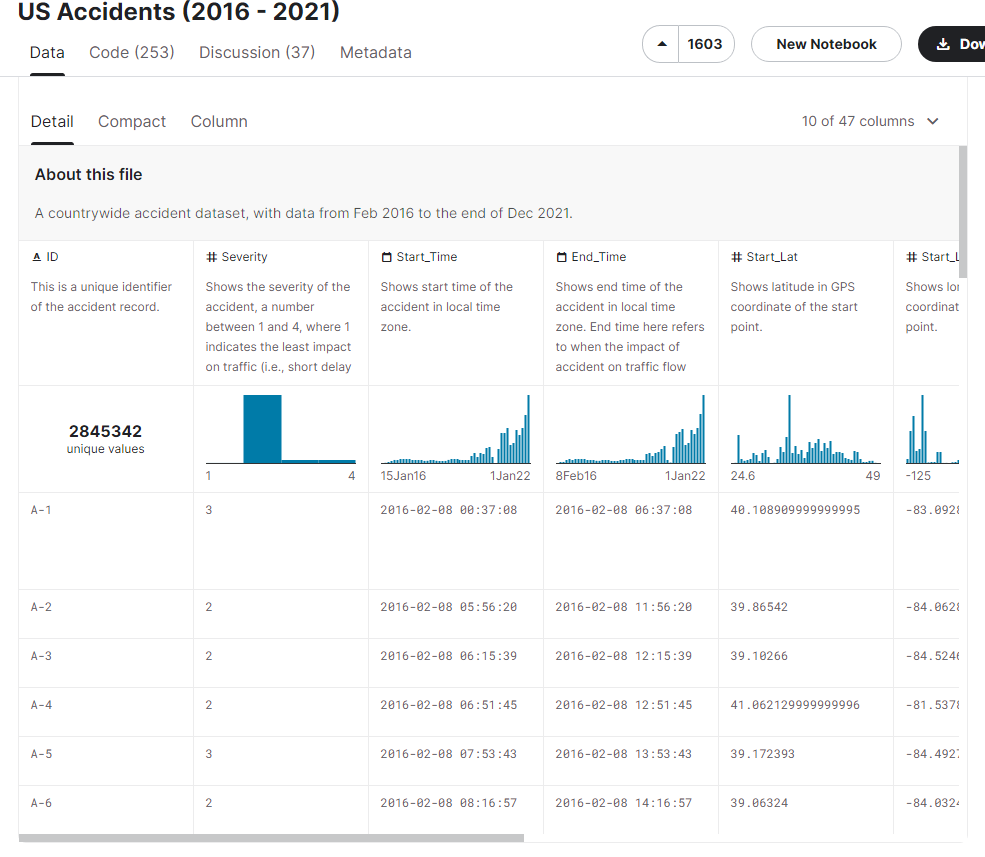

Population dataset:
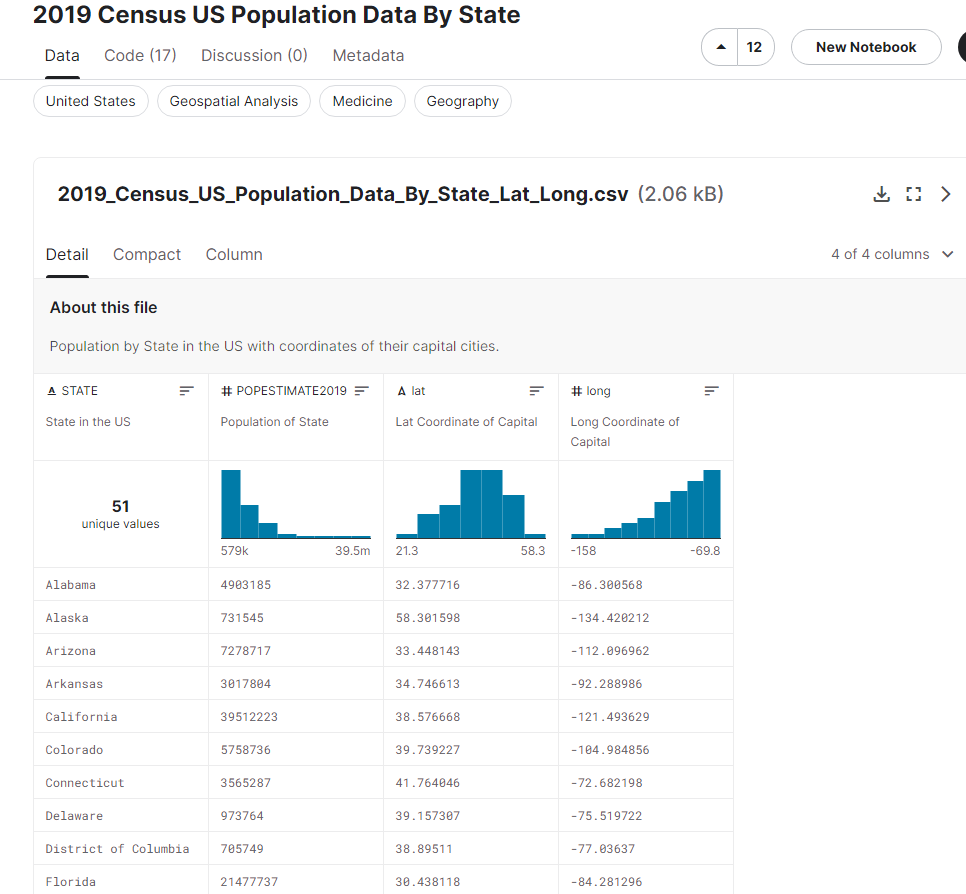

## Data Download

In [ ]:
pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddhanttripathi13
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 181MB/s]


## Data Wrangling
  - Look at the data and columns
  - Fix missing or na values

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('./us-accidents/US_Accidents_Dec21_updated.csv')

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.shape # number  of rows, number of columns

(2845342, 47)

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
numeric_df = df.select_dtypes(include='number') #selecting all numeric columns
numeric_df.head() # Data can be analysed quantitatively based on these columns

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01


In [ ]:
missing_percent = df.isnull().sum().sort_values(ascending=False)/df.shape[0] # percentage of missing values in each column
missing_percent = missing_percent[missing_percent!=0] #excluding columns which do not have missing values

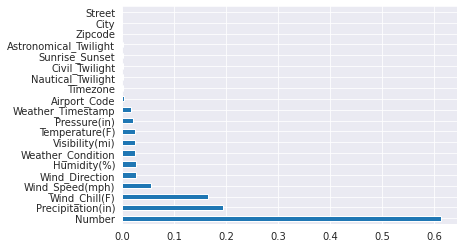

In [ ]:
missing_percent.plot(kind='barh')
plt.show()

## Exploratory Analysis and Visualization
 - City
 - Start Time
 - Start Lat and Long
 - Temperature
 - Weather Condition

### City

In [ ]:
df['City_State'] = df.City + ', ' + df.State #make a new column to avoid two cities of the same name but different state
df.City_State

0               Dublin, OH
1               Dayton, OH
2           Cincinnati, OH
3                Akron, OH
4           Cincinnati, OH
                ...       
2845337      Riverside, CA
2845338      San Diego, CA
2845339         Orange, CA
2845340    Culver City, CA
2845341       Highland, CA
Name: City_State, Length: 2845342, dtype: object

In [ ]:
cities = df.City_State.unique() 
len(cities) # number of unique cities in the dataset

16931

In [ ]:
accidents_by_city = df.City_State.value_counts()
accidents_by_city[:20]

Miami, FL           106896
Los Angeles, CA      68956
Orlando, FL          54654
Dallas, TX           41615
Houston, TX          39366
Charlotte, NC        32998
Sacramento, CA       32559
San Diego, CA        26627
Raleigh, NC          22837
Minneapolis, MN      22768
Portland, OR         20563
Nashville, TN        20160
Baton Rouge, LA      18182
Austin, TX           17928
Phoenix, AZ          16940
Saint Paul, MN       16727
New Orleans, LA      16251
Atlanta, GA          15614
Jacksonville, FL     14472
Tucson, AZ           13799
Name: City_State, dtype: int64

In [ ]:
'NY' in df.State # New York state data not available

False

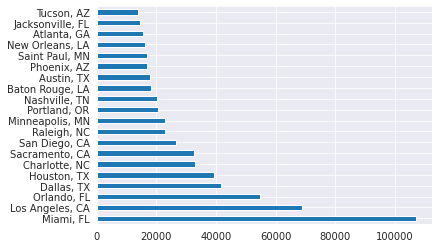

In [ ]:
accidents_by_city[:20].plot(kind='barh')
plt.show()

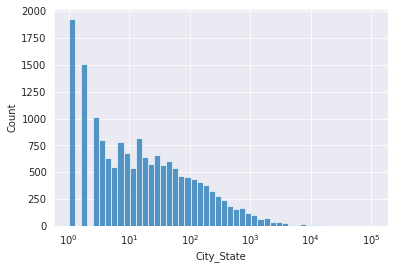

In [ ]:
sns.histplot(accidents_by_city, log_scale=True) #distribution of number of accidents by city

In [ ]:
high_accident_city = accidents_by_city[accidents_by_city >= 1000]
low_accident_city = accidents_by_city[accidents_by_city < 1000]

In [ ]:
len(high_accident_city)/len(cities) # percentage of cities with more than 1000 total accidents

0.026991908333825528

In [ ]:
len(low_accident_city)/len(cities)

0.9729490284094265

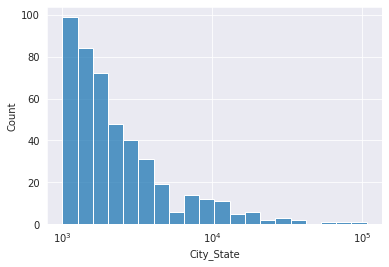

In [ ]:
sns.histplot(high_accident_city, log_scale=True)

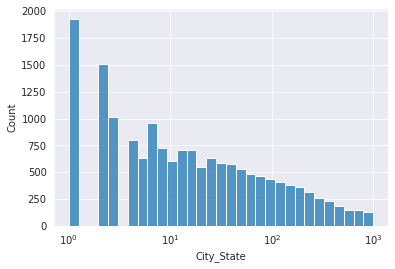

In [ ]:
sns.histplot(low_accident_city, log_scale=True)

In [ ]:
low_accident_city[low_accident_city == 1]

Rich Hill, MO                       1
Gillett, AR                         1
Elgin, OK                           1
Masontown, WV                       1
Caddo Gap, AR                       1
                                   ..
Pleasant Unity, PA                  1
La Grange, MO                       1
Ponderosa, NM                       1
Blue Grass, VA                      1
American Fork-Pleasant Grove, UT    1
Name: City_State, Length: 1927, dtype: int64

### Start Time

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,City_State
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,Night,Night,Night,Night,"Dublin, OH"
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,"Dayton, OH"
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,Night,Night,Night,Day,"Cincinnati, OH"
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,"Akron, OH"
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,"Cincinnati, OH"


In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time) #typecasting as datetime

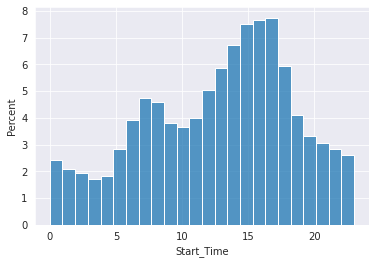

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24, stat='percent')

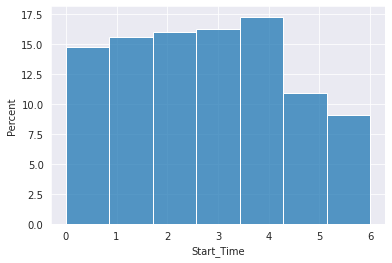

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, stat='percent')

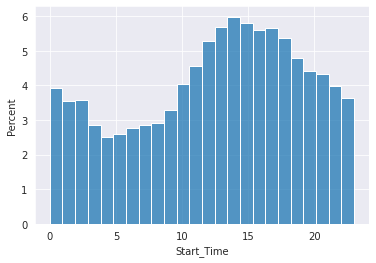

In [ ]:
weekend_df = df[(df.Start_Time.dt.dayofweek==5)|(df.Start_Time.dt.dayofweek==6)]

sns.histplot(weekend_df.Start_Time.dt.hour,stat='percent',bins=24)

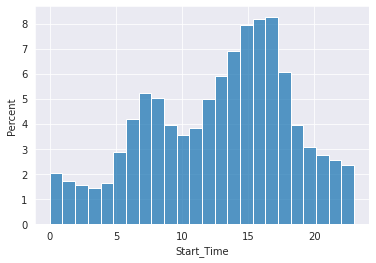

In [ ]:
weekday_df = df[df.Start_Time.dt.dayofweek <5]
sns.histplot(weekday_df.Start_Time.dt.hour,bins=24,stat='percent')

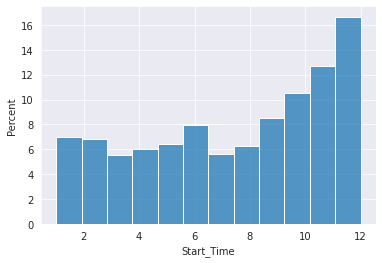

In [ ]:
sns.histplot(df.Start_Time.dt.month,bins=12,stat='percent')

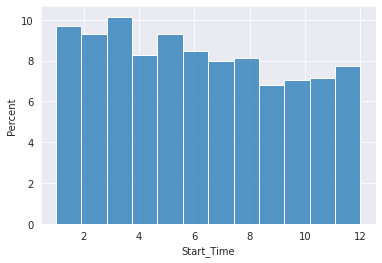

In [ ]:
year_df = df[df.Start_Time.dt.year==2017]
sns.histplot(year_df.Start_Time.dt.month,bins=12,stat='percent')

###Start Lat and Long

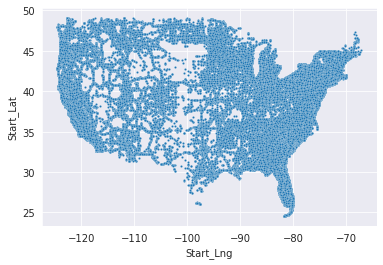

In [ ]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, s=5) # distribution of data points across US

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
map = folium.Map((40.418435, -102.081454), zoom_start=5)
heat_data=list(zip(list(df.Start_Lat), list(df.Start_Lng)))

HeatMap(heat_data[:100000]).add_to(map)
map # heatmap of data points across US

### State

In [ ]:
accidents_by_state = df.groupby('State')['ID'].count().sort_values(ascending=False)

In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [ ]:
url = 'https://www.kaggle.com/datasets/peretzcohen/2019-census-us-population-data-by-state'
od.download(url) # population data needed for per capita analysis

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: siddhanttripathi13
Your Kaggle Key: ··········


100%|██████████| 1.43k/1.43k [00:00<00:00, 1.56MB/s]

In [ ]:
pop_df = pd.read_csv('./2019-census-us-population-data-by-state/2019_Census_US_Population_Data_By_State_Lat_Long.csv')
pop_df.head()

,STATE,POPESTIMATE2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629


In [ ]:
pop_df['State_Code'] = pop_df['STATE'].apply(lambda x:us_state_to_abbrev[x])
pop_df.head()

,STATE,POPESTIMATE2019,lat,long,State_Code
0,Alabama,4903185,32.377716,-86.300568,AL
1,Alaska,731545,58.301598,-134.420212,AK
2,Arizona,7278717,33.448143,-112.096962,AZ
3,Arkansas,3017804,34.746613,-92.288986,AR
4,California,39512223,38.576668,-121.493629,CA


In [ ]:
per_capita_accidents = []

for i in accidents_by_state.index:
  per_capita_accidents.append(accidents_by_state[i]/pop_df.loc[pop_df.State_Code==i,'POPESTIMATE2019'].item())

per_capita_accidents[0]

0.020142324060076294

In [ ]:
per_capita_df = pd.concat([accidents_by_state.reset_index(), pd.Series(per_capita_accidents, name='per_capita')], axis='columns')

In [ ]:
per_capita_df = per_capita_df.sort_values('per_capita', ascending=False)

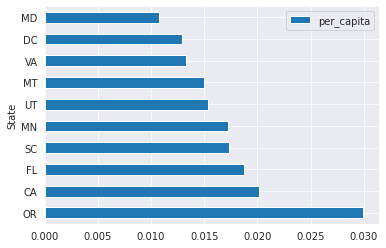

In [ ]:
per_capita_df[:10].plot(x='State', y='per_capita', kind='barh')

###Temperature

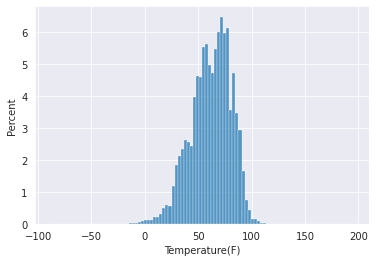

In [ ]:
sns.histplot(df['Temperature(F)'],stat='percent', bins=100)

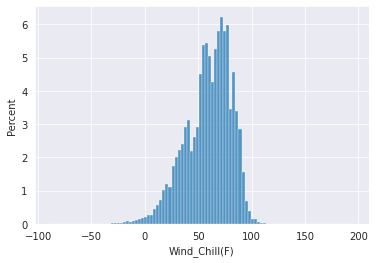

In [ ]:
sns.histplot(df['Wind_Chill(F)'],stat='percent', bins=100)

## Conclusion
  - No data for NY
  - Approx. 3% of cities have had more than 1000 total accidents
  - Data contains unusually high number of cities (1927) with just 1 total accident
  - Number of accidents per city follows an exponential decay as the number of accident increases
  - Number of accidents peak between 5am and 10am (people commuting to work maybe) but a bigger peak occurs between 1pm and 5pm (people leaving work or going for leisure activities). Corroborated by comparing weekdays and weekend data
  - Number of accidents reduced on weekends due to people not commuting to and from work
  - Number of accidents increasing by the end of year - missing data for 2016, 2020 and 2021
  - OR has the highest number of accidents per capita folowed by CA
  - Number of accidents distribution w.r.t temperature follows a normal distribution with peak at 70F. Wind chill follows the same distribution


## Future Work
 - Analysis of data based on other numerical columns such as end lat and long.
 - Analysis of data based on boolean columns denoting road condition such as bump, crossing, junction etc.
 - Analysis of data based on other weather parameters such as wind speed, pressure etc.